# Homework 2 (Feed Forward Neural Networks)

Choose a dataset that you're interested in from among these options (or choose your own data set as long as it's large enough and **you check with me** in advance):

- [Boston Housing Data](https://github.com/selva86/datasets/blob/master/BostonHousing.csv) (More info [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html))
- [Wine Quality Data](https://archive.ics.uci.edu/ml/datasets/wine+quality)
- [Spam Emails](https://archive.ics.uci.edu/ml/datasets/Spambase)
- [European Soccer Data](https://www.kaggle.com/datasets/hugomathien/soccer)(would only recommend if you want to spend some time joining and cleaning data)
- 

Then Build a Deep FEED FORWARD Neural Network (No Convolutional or Recurrent Layers) using keras/tensorflow (at least 3 *hidden* layers) to predict either a category or a continuous value.

Make sure that:

- your NN has some sort of regularization (or multiple types if needed)
- you've properly z-scored or otherwise scaled your data before training
- your model architechture and loss function are appropriate for the problem
- you print out at least 2 metrics for both train and test data to examine


Then create a **technical report** discussing your model building process, the results, and your reflection on it. The report should follow the format in the example including an Introduction, Analysis, Methods, Results, and Reflection section.

# Introduction
An introduction should introduce the problem you're working on, give some background and relevant detail for the reader, and explain why it is important. 

# Analysis 
Any exploratory analysis of your data, and general summarization of the data (e.g. summary statistics, correlation heatmaps, graphs, information about the data...). This can also include any cleaning and joining you did. 
-Explatory data analysis (Before model building)

# Methods
Explain the structure of your model and your approach to building it. This can also include changes you made to your model in the process of building it. Someone should be able to read your methods section and *generally* be able to tell exactly what architechture you used. 
-What is mthod do

# Results
Detailed discussion of how your model performed, and your discussion of how your model performed.

# Reflection
Reflections on what you learned/discovered in the process of doing the assignment. Things you would do differently in the future, ways you'll approach similar problems in the future, etc.


# What to Turn In

- PDF of your technical report
- your code as a .py, .ipynb, or link to github (you must turn it in either as a file, or a link to something that has timestamps of when the file was last edited)
- a README file as a .txt or .md

In [69]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from keras.datasets import mnist
import tensorflow.keras as kb
from tensorflow.keras import backend
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer


from plotnine import *

from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv


In [70]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
df.dropna()

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [71]:
feats = ["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "b", "lstat"]
predict = "medv"

X = df[feats]
y = df[predict]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

z = StandardScaler()

X_train[feats] = z.fit_transform(X_train[feats])
X_test[feats] = z.transform(X_test[feats])

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


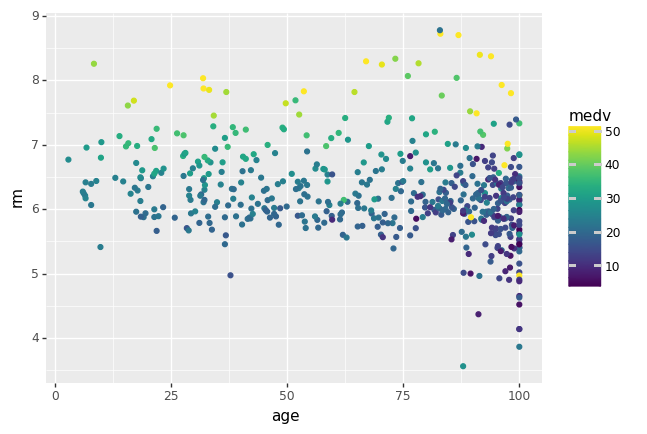

<ggplot: (8765223147141)>

In [73]:
(ggplot(df, aes(x = "age", y = "rm", color = y)) + geom_point())

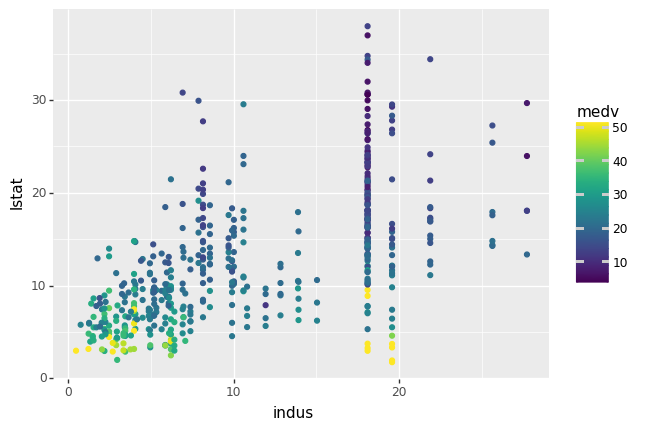

<ggplot: (8765223153981)>

In [74]:
(ggplot(df, aes(x = "indus", y = "lstat", color = y)) + geom_point())

In [75]:
# Regression

#structure of the model
model = kb.Sequential([
  kb.layers.Dense(13, input_shape = [13]),
  kb.layers.Dense(9, activation = "relu"),
  kb.layers.Dropout(0.5),
  kb.layers.BatchNormalization(),
  kb.layers.Dense(7, activation = "relu"),
  kb.layers.Dropout(0.1),
  kb.layers.BatchNormalization(),
  kb.layers.Dense(5, activation = "relu"),
  kb.layers.Dropout(0.3),
  kb.layers.BatchNormalization(),
  kb.layers.Dense(3, activation = "relu"),
  kb.layers.Dropout(0.2),
  kb.layers.BatchNormalization(),
  kb.layers.Dense(1)
])

#train the model
model.compile(loss = "mean_squared_error",
              optimizer = "adam")

#fit the model
model.fit(X_train, y_train, epochs = 250, validation_data = (X_test, y_test))

Epoch 1/250
13/13 [==============================] - 4s 25ms/step - loss: 599.8669 - val_loss: 552.5670
Epoch 2/250
13/13 [==============================] - 0s 10ms/step - loss: 595.7994 - val_loss: 546.4573
Epoch 3/250
13/13 [==============================] - 0s 9ms/step - loss: 595.3945 - val_loss: 542.4302
Epoch 4/250
13/13 [==============================] - 0s 9ms/step - loss: 592.7382 - val_loss: 539.8506
Epoch 5/250
13/13 [==============================] - 0s 12ms/step - loss: 588.8816 - val_loss: 536.9978
Epoch 6/250
13/13 [==============================] - 0s 11ms/step - loss: 589.0596 - val_loss: 534.8594
Epoch 7/250
13/13 [==============================] - 0s 9ms/step - loss: 586.5908 - val_loss: 533.3559
Epoch 8/250
13/13 [==============================] - 0s 9ms/step - loss: 583.2939 - val_loss: 531.0692
Epoch 9/250
13/13 [==============================] - 0s 9ms/step - loss: 581.2891 - val_loss: 529.4434
Epoch 10/250
13/13 [==============================] - 0s 10ms/step - 

In [76]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 13)                182       
                                                                 
 dense_26 (Dense)            (None, 9)                 126       
                                                                 
 dropout_6 (Dropout)         (None, 9)                 0         
                                                                 
 batch_normalization_3 (Batc  (None, 9)                36        
 hNormalization)                                                 
                                                                 
 dense_27 (Dense)            (None, 7)                 70        
                                                                 
 dropout_7 (Dropout)         (None, 7)                 0         
                                                      

In [77]:
model.get_weights()

[array([[ 0.0271395 ,  0.3934798 , -0.5139283 , -0.00973308, -0.27106524,
          0.33213708,  0.17132974,  0.2044225 , -0.1545315 , -0.05850618,
         -0.33830678, -0.28671744,  0.02536461],
        [ 0.00593144,  0.2581871 ,  0.17338428,  0.12861666, -0.38015518,
          0.38378036,  0.05269977, -0.09055702,  0.30509645,  0.41849083,
         -0.06492507, -0.06672626,  0.2174957 ],
        [-0.25760853,  0.37605503,  0.4860069 ,  0.05157835, -0.27743867,
          0.0580654 , -0.0672876 ,  0.41716442,  0.5347693 ,  0.37905887,
          0.10061335,  0.05699892,  0.34515867],
        [-0.22769667,  0.16583301,  0.2588807 ,  0.36549258,  0.01961786,
         -0.11601698, -0.24980992, -0.17287138, -0.25662994,  0.38112745,
          0.36480507, -0.13006705,  0.04085054],
        [ 0.19034913, -0.1527338 ,  0.3989253 ,  0.12561563, -0.35704488,
          0.03438231, -0.5034387 , -0.10050345, -0.01781461, -0.14714858,
         -0.20412084,  0.06804942,  0.28667247],
        [-0.362

In [78]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [79]:
print("Train MSE: ", mean_squared_error(y_train, y_pred_train))
print("Test MSE: ", mean_squared_error(y_test, y_pred_test))

Train MSE:  33.457898184580266
Test MSE:  40.01679414585686


In [80]:
print("Train MAE: ", mean_absolute_error(y_train, y_pred_train))
print("Test MAE: ", mean_absolute_error(y_test, y_pred_test))

Train MAE:  3.994172006550402
Test MAE:  3.991711635215609
